In [271]:
# ייבוא ספריות
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [272]:
# התפלגות נורמלית
normal_dist = np.random.randn(10000) 

def print_stat(array):
    print("↡↡↡--mean--↡↡↡")
    print(round(np.mean(normal_dist)))
    print("↡↡↡--std--↡↡↡") 
    print(round(np.std(normal_dist)))
    print("↡↡↡--median--↡↡↡")
    print(round(np.median(normal_dist)))
    print("↡↡↡--mode--↡↡↡")
    print(round(stats.mode(normal_dist)[0][0]))

print_stat(normal_dist)



↡↡↡--mean--↡↡↡
0
↡↡↡--std--↡↡↡
1
↡↡↡--median--↡↡↡
0
↡↡↡--mode--↡↡↡
-4


↡↡↡--mean--↡↡↡
3
↡↡↡--std--↡↡↡
3
↡↡↡--median--↡↡↡
3
↡↡↡--mode--↡↡↡
-10


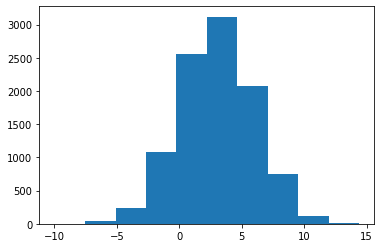

In [273]:
normal_dist = 3 * np.random.randn(10000) + 3 # ניתן לבצע הזזות 

plt.hist(normal_dist)

print_stat(normal_dist)

In [274]:
#  אחוזון ה80
np.percentile(normal_dist,80)

5.524920932669002

In [275]:


def remove_column_outliers(columnName,df):
    
    df_s = df
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        print("!!--We found Outliers--!!")
        print("----------------------------")
        print("↡↡↡--Top outliears--↡↡↡")
        print(df.head(3))
        print("----------------------------")
        print("↡↡↡-- Bottom outliears--↡↡↡")
        print(df.tail(3))
        

        decision = int(input("Do you want us to clean the outliers? 0 = no , 1 = yes, but not too many , 2 = yaa!! clean it all!"))

        if decision == 1:
            new_df = df[filter]
            return(new_df)
        elif decision == 2:
            num_slice = int(df.shape[0]*0.2)
            df_temp = df.abs()
            top =df.shape[0] - num_slice - 1
            bottom = num_slice 
            new_df2 = df_temp.loc[bottom:top]
            return new_df2
        else: 
            return(df_s)
    else:
        print("No outliers ;)")
        return(df_s)

    

In [276]:
from scipy import stats
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

def deicide_trim_orNot(columnName,df):
    df = df.sort_values(by=[columnName],ascending=False)
    df = df[[columnName]]

    z_scores = stats.zscore(df)
    abs_z = (np.abs(z_scores))
    filter = (abs_z < 1).all(axis = 1)

    if df.shape[0] != filter.sum():
        trim = str(round(stats.trim_mean(df, 0.25)[0],2))
        return "the best kpi that describe your data is Trim Mean: " + trim   
    else:
        return("No outliers ;)  the best kpi that describe your data is: Mean" + str(df.mean()[0]))

########################################################

def normal_std(df):
   x = int(df.std())
   x = str(x)
   count = int(len(x))
   x = int(x)
   return x*10**(-abs((count-2)))

########################################################

def clean_dollar(df):
    df = df.astype(str)
    df= df.replace(r"\$","",regex= True)
    df= df.replace(r"\,","",regex=True)
    df= df.replace(r"\%","",regex=True)
    df = df.astype(float)
    return df

########################################################
def OurWordCloud(df,title = None,pic_shape = " "):
       stopwords = set(STOPWORDS)

       wordcloud = WordCloud(
           background_color="white",
           stopwords=stopwords,
           max_words=22,
           max_font_size=40,
           scale= 3,
           random_state=1).generate(str(df))

       fig = plt.figure(1,figsize=(10,10))
       plt.axis("off")
       if title:
           fig.suptitle(title,fontsize=15)
           fig.subplots_adjust(top = 2.3)
    
       plt.imshow(wordcloud)
       plt.show()
########################################################

def top_analyst(columnName,df):
    df_save = df
    df = df[[columnName]]

    if df.dtypes[0] == 'int' or df.dtypes[0] == 'float':
        if columnName.lower() == "salary":
            return "the best kpi that describe your data is Median: " +  str(round(df.median()[0]))
        elif normal_std(df) > 2:
            return deicide_trim_orNot(columnName,df_save)
        else:
            return "No outliers ;)  the best kpi that describe your data is : Mean " + str(round(df.mean()[0],2))  

    elif df.dtypes[0] == 'object':
        if "$" in df[columnName][1] or columnName.lower() == "Salary":
            user = int(input("now we talk money! salary = 1 money change over time = 0"))
            if user == 1:
                df = clean_dollar(df)
                return "the best kpi that describe your data is Median:  " +  str(round(df.median()[0]))

            elif user == 0:
                df = clean_dollar(df)
                df = df.pct_change() + 1
                df = df.loc[1:]
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],2))

        elif "%" in df[columnName][1]:
            user= int(input("change over time? yes = 1 no = 0"))
            if user ==  1:
                df = clean_dollar(df)
                df = df.loc[1:] / 100
                return "the best kpi that describe your data is Geometric Mean: "+ str(round(stats.gmean(df)[0],2))
            else:
                df = clean_dollar(df)
                trim = str(round(stats.trim_mean(df, 0.25)[0],2))
                return "the best kpi that describe your data is Trim Mean: " + trim +"%"
        else:
            if len(df[columnName][0]) > 18:
                print("the best way to describe your data is by Word Cloud: ")
                return OurWordCloud(df[columnName])
            else:
               print("the best way to describe your data is by Histogram")
               return sns.catplot(x = columnName,kind = "count",palette= "magma",data = df)
            
    
df = pd.read_excel("test.xlsx")

print(top_analyst("profits",df))

df.head()

the best kpi that describe your data is Geometric Mean: 1.35


,manger name,id,test scores,salary,profits,p chagne%,details
0,tom,1,80,$100.00,$10000.00,0%,the person very good
1,tom,1,90,$200.00,$22000.00,220%,very good high
2,chen,2,43,$500.00,$32100.00,146%,need to work more
3,shani,3,25,$300.00,$42000.00,131%,very noesy high
4,sivan,4,6,"$1,000.00",$50000.00,119%,good sttricute
